# Compendio de simulaciones

## Determinación de la razón entre intensidades

EL siguiente código permite determinar la razón entre dos intensidades a partir del valor reportado en decibeles.

In [1]:
###########################
dB = 80 # intensidad den dB
###########################

Ir = 10**(dB/10)
print('Para un sonido de %.2f dB la razón entre las intensidades es %.2e'%(dB,Ir))

Para un sonido de 80.00 dB la razón entre las intensidades es 1.00e+08


## Distribución binomial

Este código construye al gráfica de la función de probabilidad de masa de una distribución binomial

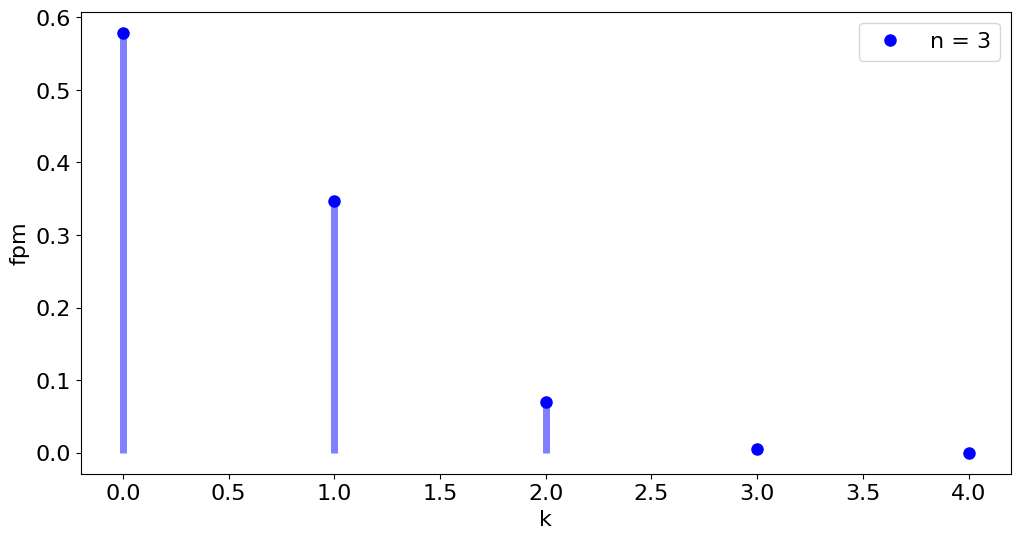

In [2]:
# Con este código se genera la función de probabilidad de masa de la distribución binomial

###############
n = 3        # Número de eventos
p = 1/6      # Probabilidad de acierto
################

from scipy.stats import binom
import pylab as plt
import numpy as np
plt.rcParams.update({'font.size': 16})
fig, ax1 = plt.subplots(1,figsize=(12,6))

x = np.arange(0,5)
ax1.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label=r'n = {}'.format(n))
ax1.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax1.legend()
ax1.set_xlabel('k')
ax1.set_ylabel('fpm')
plt.show()

## Caida libre

El siguiente ejemplo simula unos datos experimentales del tiempo de caída libre de un objeto cuando es lanzado desde una altura $h$ de $2$ metros. Tomando como valor aceptado para la aceleración de la gravedad $g = 9.77 \ \text{m s}^{-2}$ y usando la fórmula $t = \sqrt{h/g}$, el valor aceptado de tiempo de caída será $0.6398 \ \text{s}$. Suponiendo que las medidas con un cronómetro tendrán una dispersión debida a los errores aleatorios, controlada con el parámetro `sigma`, y un error en el valor inicial de tiempo debido a un error sistemático, dado por el parámetro `dt`. Siendo `N` el número de lanzamientos hechos modifique estos valores y corrobore los conceptos de precisión y exactitud.

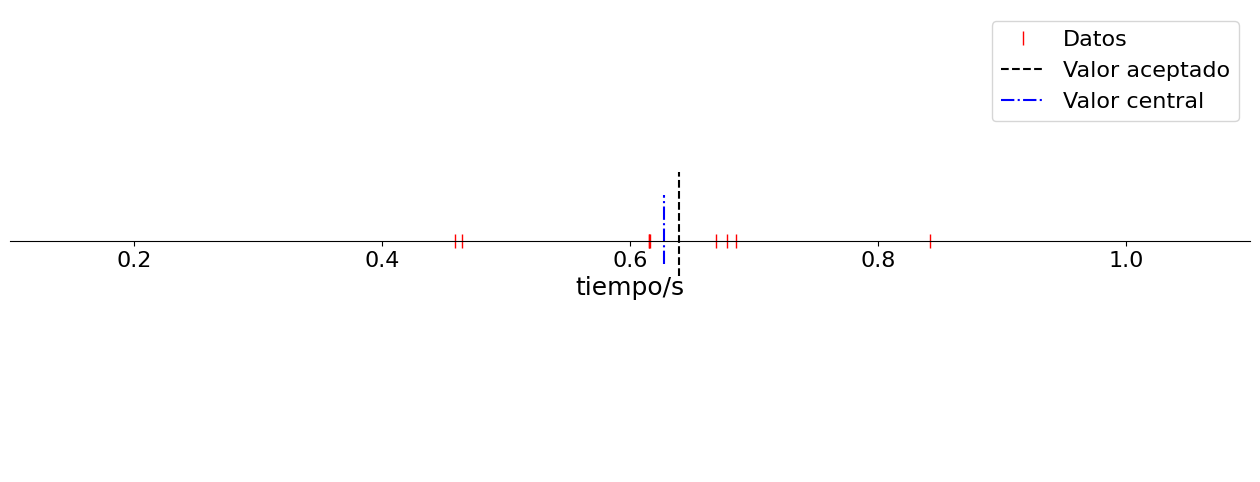

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Modifique los valores N, sigma y dt, y corra el programa
################
N = 9          # Número de mediciones
sigma = 0.1    # Incertidumbre en la medida del tiempo, en segundos
dt = 0.05      # Error sistemático en la medida del tiempo, en segundos
################

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

def graf1(data):
    central = np.mean(data)
    eje = np.zeros(len(data))
    fig , ax1 = plt.subplots(figsize=(16,6))
    ax1.plot(data,eje,'r|',ms= 10,label='Datos')
    ax1.vlines(0.6398,-0.15,0.3,'k',linestyle='--',label='Valor aceptado')
    ax1.vlines(central,-0.1,0.2,'b',linestyle='-.',label='Valor central')
    ax1.set(yticklabels=[])  # remove the tick labels
    ax1.tick_params(left=False)  # remove the ticks
    ax1.set_xlabel('tiempo/s',fontsize=18)
    ax1.set_xlim(0.1,1.1)
    ax1.set_ylim(-1,1)
    legend_without_duplicate_labels(ax1)
    # use set_position
    ax1.spines['top'].set_color('none')
    ax1.spines['left'].set_color('none')
    ax1.spines['right'].set_color('none')
    ax1.spines['bottom'].set_position('zero')

data = sigma*np.random.randn(1,N) + 0.6398 + dt

graf1(data)

## Gráfica de la función densidad de probabilidad de una distribución normal

Esta simulación permite cambiar la forma de visualizar el histograma de una distribución normal, cambiando el tamaño de la muestra y el número de intervalos. La distribución tiene media cero y varianza uno.

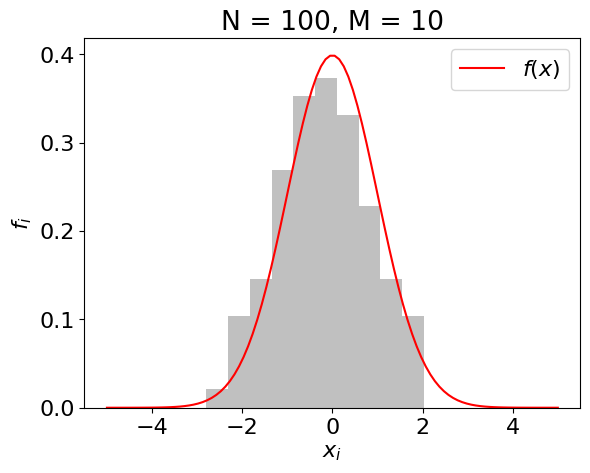

In [4]:
##########################
N = 100    # Tamaño muestra. Cambiar por ejemplo hasta 1000 
M = 10      # Número de intervalos. Cambiar por ejemplo hasta 100
##########################

import numpy as np
import pylab as plt
plt.rcParams.update({'font.size': 16})

def normal(x,loc=0,scale=1):
    return (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

np.random.seed(0)
conjunto = np.random.normal(loc=0,scale=1,size=N)
infoHist = plt.hist(conjunto,bins=M,density=True,align='left',
                   color='silver')
x = np.linspace(-5,5,100)
plt.plot(x,normal(x,loc=0,scale=1),color='r',label=r'$f(x)$')
plt.title(r'N = {}, M = {}'.format(N,M))
plt.xlabel(r'$x_i$')
plt.ylabel(r'$f_i$')
plt.legend()
plt.show()

## Distribución de Poisson

Código para graficar la distribución de Poisson con media `mu`.

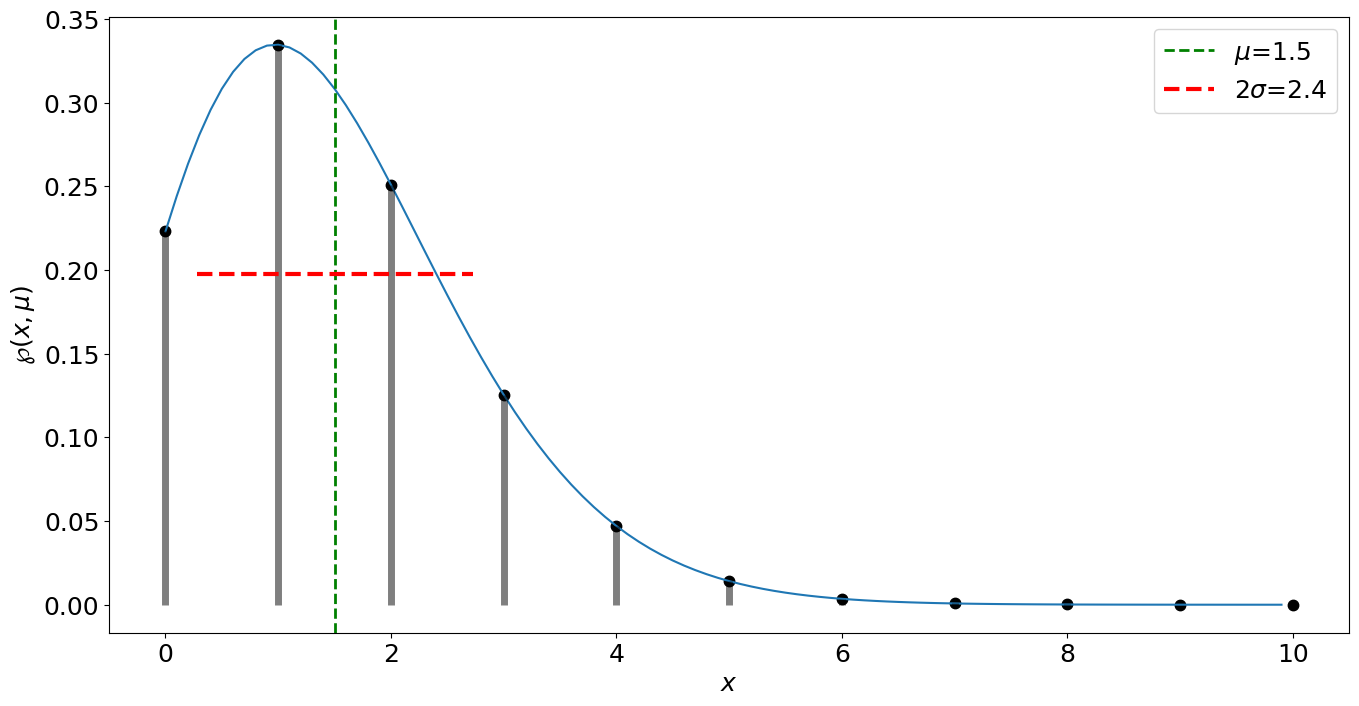

In [5]:
#### Parámetros de la distribución ###
mu = 1.5      # media aritmética
rango = 10    # valor máximo a graficar
######################################

import numpy as np
from scipy.special import factorial
import pylab as plt
plt.rcParams.update({'font.size': 18})

sigma = np.sqrt(mu)
x = np.arange(0,rango,0.1)
xdisc = np.arange(0,rango+1,1.0)

def distP(mu,x):
    return (mu**x)*np.exp(-mu)/factorial(x)

plt.figure(figsize=(16,8))
plt.plot(xdisc,distP(mu,xdisc),'k.',ms=15)
plt.plot(x,distP(mu,x))
plt.vlines(xdisc,0, distP(mu,xdisc), colors='k', lw=5, alpha=0.5)
plt.axvline(mu, linestyle='--', linewidth=2, c="green", label='$\mu$=%.1f'%mu)
plt.plot([mu-sigma, mu+sigma], [1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2)), 
                                1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2))], linewidth=3, 
         linestyle="--", color="red", solid_capstyle="butt", label='$2\sigma$=%.1f'%(2*sigma))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$\wp(x,\mu)$')
plt.show()

## Simulación teorema del límite central

Este programa te permite ver el efecto del teorema del límite central para las distribuciones uniforme, normal y de Poisson

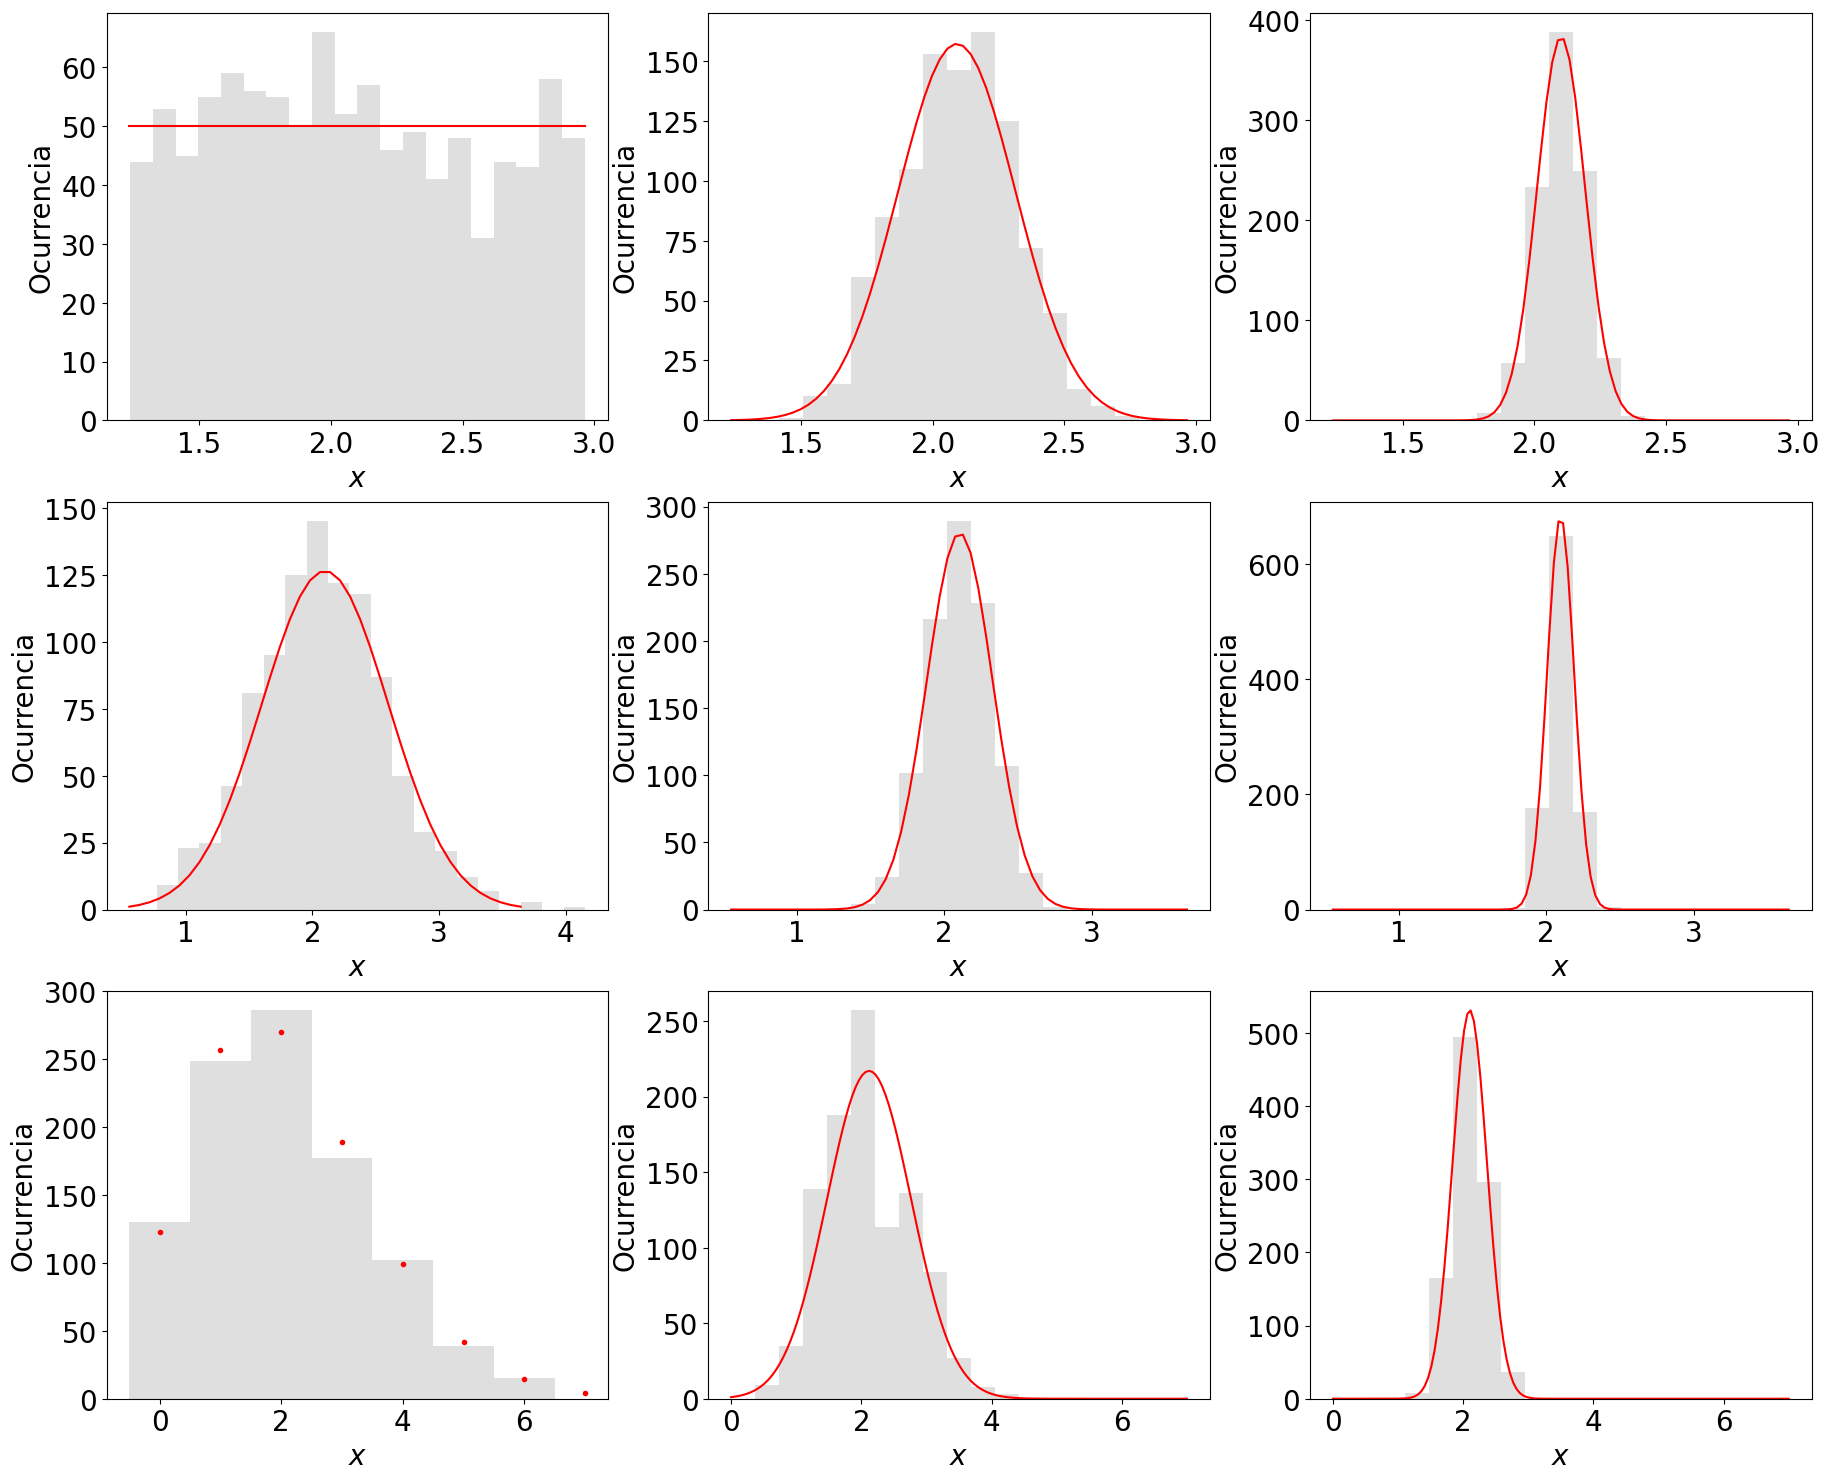

In [6]:
###### Parámetros ##################################################
media = 2.100      # media de la distribución
desv = 0.500       # Desviación estándar de la distribución
N = 1000         # Número de datos de la muestra de la distribución
semilla = 2      # Semilla usada para la generación de las variables aleatorias
n = 20           # Número de intervalos (bins) a graficas en los histogramas
grupA = 5        # Cantidad de datos agrupados en cada medida de la distribución muestral de la media (columna 2)
grupB = 30       # # Cantidad de datos agrupados en cada medida de la distribución muestral de la media (columna 3)
####################################################################

import numpy as np
import pylab as plt
from scipy import stats
from scipy.special import factorial
plt.rcParams.update({'font.size': 20})
np.random.seed(semilla)
figs, axs = plt.subplots(3,3,figsize=(22,18))

def diferP(val0,val):
    return 100*abs(val0-val)/val0


### Distribución Uniforme ###
#############################

def pdfUniform(media,desv):
    b = media + np.sqrt(12)*desv/2
    a = 2*media - b
    pdf = 1/(b-a)
    return a,b,pdf

# Creación de distribución aleatoria
a,b,pdfUni = pdfUniform(media,desv)
alUniforme = np.random.uniform(a,b,size=N)

## Creación de funciones de densidad
x = np.linspace(a,b,n)
dUni = N/(pdfUni*n)

## Agrupación A
UniA = []
for ii in range(N):
        UniA.append(np.mean(np.random.uniform(a,b,grupA)))
        
## Agrupación B
UniB = []
for ii in range(N):
        UniB.append(np.mean(np.random.uniform(a,b,grupB)))

## Grafica
axs[0,0].hist(alUniforme,bins=n, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
axs[0,0].plot(x,dUni*pdfUni*np.ones(n),color='r')

# Agrupación A
bins = np.linspace(a,b,n)
axs[0,1].hist(UniA,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
desvA = desv/np.sqrt(grupA)
mediaA = np.mean(UniA)
bins = np.linspace(a,b,3*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaA,scale=desvA)
dnormal = 3*len(UniA)*(bins[1]-bins[0])
axs[0,1].plot(bins,fUniforme2*dnormal,'r')


# Agrupación B
bins = np.linspace(a,b,n)
axs[0,2].hist(UniB,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
desvB = desv/np.sqrt(grupB)
mediaB = np.mean(UniB)
bins = np.linspace(a,b,4*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaB,scale=desvB)
dnormal = 4*len(UniB)*(bins[1]-bins[0])
axs[0,2].plot(bins,fUniforme2*dnormal,'r')


### Distribución normal ###
###########################

# creación distribución aletoria
alnormal = stats.norm.rvs(loc=media,scale=desv,size=N,random_state=semilla)

# creación de función densidad
x1 = np.linspace(stats.norm.ppf(0.001,loc=media,scale=desv),stats.norm.ppf(0.999,loc=media,scale=desv), 2*n)
fnormal = stats.norm.pdf(x1,loc=media,scale=desv)
dnormal = 2*N*(x1[1]-x1[0])

## Agrupación A
UniA = []
for ii in range(N):
        UniA.append(np.mean(stats.norm.rvs(loc=media,scale=desv,size=grupA,random_state=None)))
        
## Agrupación B
UniB = []
for ii in range(N):
        UniB.append(np.mean(stats.norm.rvs(loc=media,scale=desv,size=grupB,random_state=None)))

mediaA = np.mean(UniA)
mediaB = np.mean(UniB)
        
# Grafica
axs[1,0].hist(alnormal,bins=n, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
axs[1,0].plot(x1,fnormal*dnormal,'r')

# Agrupación A
bins = np.linspace(x1[0],x1[-1],n)
axs[1,1].hist(UniA,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x1[0],x1[-1],3*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaA,scale=desvA)
dnormal = 3*len(UniA)*(bins[1]-bins[0])
axs[1,1].plot(bins,fUniforme2*dnormal,'r')


# Agrupación B
bins = np.linspace(x1[0],x1[-1],n)
axs[1,2].hist(UniB,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x1[0],x1[-1],5*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaB,scale=desvB)
dnormal = 5*len(UniB)*(bins[1]-bins[0])
axs[1,2].plot(bins,fUniforme2*dnormal,'r')
    
        
### Distribución de Poisson ###
###############################

def distP(mu,x):
    return (mu**x)*np.exp(-mu)/factorial(x)

# creación distribución aleatorioa
#alpoisson = stats.poisson.rvs(media,loc=0,size=N,random_state=semilla)
#alpoisson = np.random.Generator.poisson(media,N)
rng = np.random.default_rng()
alpoisson = rng.poisson(media,N)

# creación de función densidad
x2 = np.arange(stats.poisson.ppf(0.001,media),stats.poisson.ppf(0.999,media))
#fpoisson = stats.poisson.pmf(x2,media)
fpoisson = distP(media,x2)

## Agrupación A
UniA = []
for ii in range(N):
        UniA.append(np.mean(rng.poisson(media,grupA)))
        
## Agrupación B
UniB = []
for ii in range(N):
        UniB.append(np.mean(rng.poisson(media,grupB)))

mediaA = np.mean(UniA)
mediaB = np.mean(UniB)
desvA = np.sqrt(media/grupA)
desvB = np.sqrt(media/grupB)
        
# Grafica
nn,bini,pp = axs[2,0].hist(alpoisson,bins=x2, histtype='stepfilled', align='left',color='silver', alpha=0.5)
axs[2,0].plot(x2,fpoisson*N,'r.')

# Agrupación A
bins = np.linspace(x2[0],x2[-1],n)
axs[2,1].hist(UniA,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x2[0],x2[-1],7*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaA,scale=desvA)
fUniforme3 = stats.norm.pdf(bins,loc=mediaA,scale=np.std(UniA))
dnormal = 7*len(UniA)*(bins[1]-bins[0])
axs[2,1].plot(bins,fUniforme2*dnormal,'r')
#axs[2,1].plot(bins,fUniforme3*dnormal,'gray')

# Agrupación B
bins = np.linspace(x2[0],x2[-1],n)
axs[2,2].hist(UniB,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x2[0],x2[-1],7*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaB,scale=desvB)
fUniforme3 = stats.norm.pdf(bins,loc=mediaB,scale=np.std(UniB))
dnormal = 7*len(UniB)*(bins[1]-bins[0])
axs[2,2].plot(bins,fUniforme2*dnormal,'r')
#axs[2,2].plot(bins,fUniforme3*dnormal,'gray')

for ax in axs.flat:
    ax.set(xlabel='$x$', ylabel='Ocurrencia')
plt.show()

## Incertidumbre estándar

Este código permite simular el efecto de las fluctuaciones de los datos experimentales en el reporte del valor esperado y la incertidumbre, usando la incertidumbre estándar.

Distribución original: media = 2.1000, desv = 0.5000
Distribución de las medias: 2.1078 +/- 0.0151
Para 5 datos: 2.1715 +/- 0.2648
Para 15 datos: 2.0275 +/- 0.1080
Para 25 datos: 2.0281 +/- 0.1184
Para 35 datos: 2.1505 +/- 0.0885


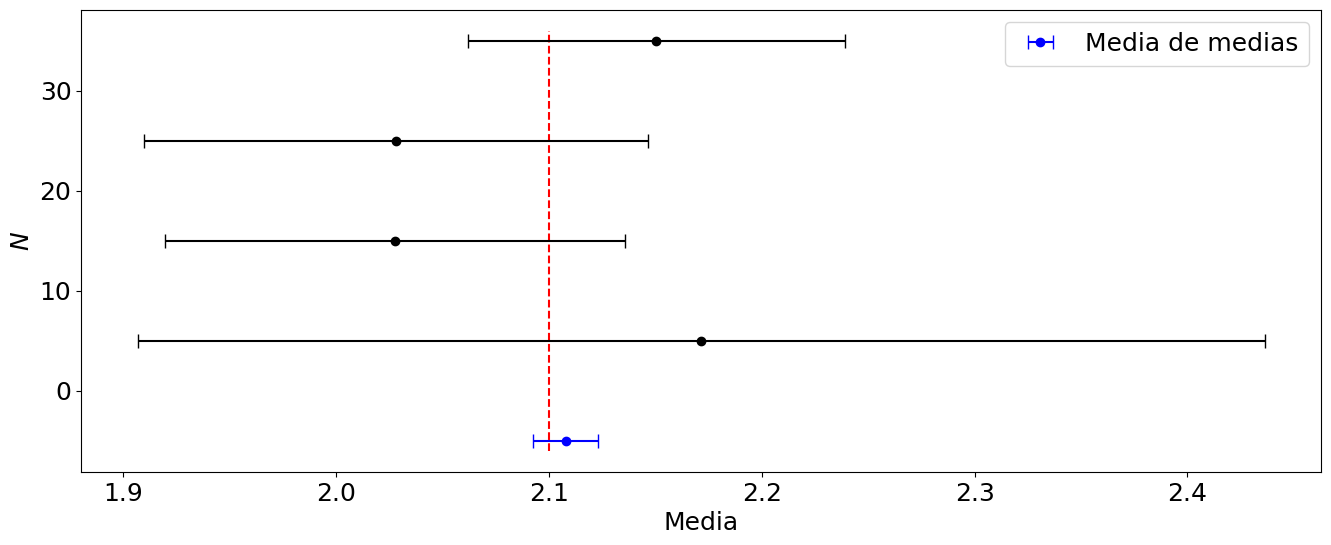

In [7]:
###################
media = 2.1    # media de la distribución original
desv = 0.5     # desviación estándar de la distribución 
semilla = 5    # semilla para el generador de valores aleatorios
N = 35         # Total de medidas por vez
n = 10         # Veces que se repite el total de medidas
##################

import numpy as np
import pylab as plt
plt.rcParams['errorbar.capsize'] = 5
plt.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(1,figsize=(16,6))

def pdfUniform(media,desv):
    b = media + np.sqrt(12)*desv/2
    a = 2*media - b
    pdf = 1/(b-a)
    return a,b,pdf

#Intervalo de la distribución
a,b,pdfUni = pdfUniform(media,desv)
ax.vlines(media,-6,N+1,ls='--',color='r')
ax.set_xlabel('Media')
ax.set_ylabel('$N$')

#Repetición del experimento n veces
np.random.seed(semilla)
newDist = []
for ii in range(n):
    newDist.append(np.mean(np.random.uniform(a,b,size=N)))

newDist_m = np.mean(newDist)
newDist_s = np.std(newDist,ddof=1)/np.sqrt(N)
ax.errorbar(newDist_m,-5,xerr=newDist_s,fmt='o',color='b',label='Media de medias')

print('Distribución original: media = {:.4f}, desv = {:.4f}'.format(media,desv))
print('Distribución de las medias: {:.4f} +/- {:.4f}'.format(newDist_m,newDist_s))

#procedimiento práctico
np.random.seed(semilla)
for ii in range(5,N+1,10):
    vals = np.random.uniform(a,b,size=ii)
    Prac_m = np.mean(vals)
    Prac_s = np.std(vals,ddof=1)/np.sqrt(ii)
    print('Para {} datos: {:.4f} +/- {:.4f}'.format(ii,Prac_m,Prac_s))
    ax.errorbar(Prac_m,ii,xerr=Prac_s,fmt='o',color='k')

#ax.set_yticks(range(-5,N+1,10),['$N = 35$, $n = 10$','$N = 5$','$N = 15$', '$N = 25$', '$N = 35$'])
plt.legend()
plt.show()